In [23]:
# Matt Caraher
# 4/5/2022
# Project 5 P1


In [24]:
import pandas as pd
import numpy as np

wineDF = pd.read_csv("https://raw.githubusercontent.com/mattcar265/IDS/main/Project%205/WineFlagAll.csv")

wineDF


,Type,AlcoholFlag,SugarFlag
0,Red,High,High
1,Red,High,Low
2,Red,Low,High
3,Red,High,Low
4,Red,Low,Low
...,...,...,...
3340,White,High,High
3341,White,High,Low
3342,White,High,Low
3343,White,High,Low


In [25]:
# Check for any null values

wineDF.isnull().sum()


Type           0
AlcoholFlag    0
SugarFlag      0
dtype: int64

In [27]:
# Creating labelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# Change order of columns to put target at the end
wineDF = wineDF[['AlcoholFlag', 'SugarFlag', 'Type']]

# save the encoded dataframe here
encoded_wineDF = pd.DataFrame()

# Encode  only the categoric or boolean attributes
for i in range(0, wineDF.shape[1]):
    if wineDF.dtypes[i]=='object' or wineDF.dtypes[i]=='bool':
        encoded_wineDF[wineDF.columns[i]] = le.fit_transform(wineDF[wineDF.columns[i]])

# Converting string attributes into numbers
alcohol_encoded=le.fit_transform(wineDF['AlcoholFlag'])
sugar_encoded=le.fit_transform(wineDF['SugarFlag'])

# convert the taget now
labels = le.fit_transform(wineDF['Type'])

# Combining all features
features = list(zip(alcohol_encoded, sugar_encoded))

print(wineDF, "\n", pd.DataFrame(features))

print("\n\n")

print(labels)




     AlcoholFlag SugarFlag   Type
0           High      High    Red
1           High       Low    Red
2            Low      High    Red
3           High       Low    Red
4            Low       Low    Red
...          ...       ...    ...
3340        High      High  White
3341        High       Low  White
3342        High       Low  White
3343        High       Low  White
3344        High       Low  White

[3345 rows x 3 columns] 
       0  1
0     0  0
1     0  1
2     1  0
3     0  1
4     1  1
...  .. ..
3340  0  0
3341  0  1
3342  0  1
3343  0  1
3344  0  1

[3345 rows x 2 columns]



[0 0 0 ... 1 1 1]


In [ ]:
# Create contingency table for Type vs. alcohol content

crosstab1 = pd.crosstab(wineDF.Type, wineDF.AlcoholFlag)

print(crosstab1)


AlcoholFlag  High   Low
Type                   
Red           485   600
White        1176  1084


In [ ]:
# Create contingency table for Type vs. sugar content

crosstab2 = pd.crosstab(wineDF.Type, wineDF.SugarFlag)

print(crosstab2)


SugarFlag  High  Low
Type                
Red         237  848
White      1382  878


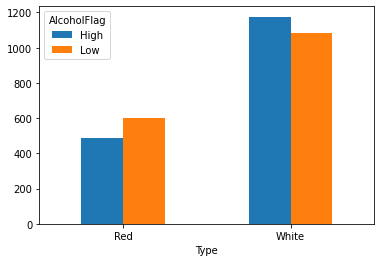

In [ ]:
# Plotted contingency table for Type vs. alcohol content

barplot = crosstab1.plot.bar(rot=0)


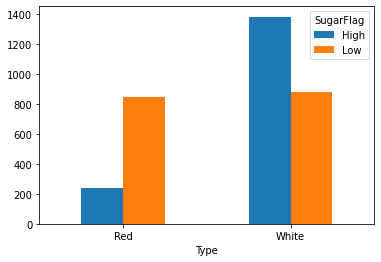

In [ ]:
# Plotted contingency table for Type vs. sugar content

barplot = crosstab2.plot.bar(rot=0)


In [ ]:
# The prior probability of Type = Red and Type = White
# P(Red) = 1085 / 3345
# P(White) = 2260 / 3345

# The probability of high and low alcohol content
# P(High) = 1661 / 3345
# P(Low) = 1684 / 3345

# The probability of high and low sugar content
# P(High) = 1619 / 3345
# P(Low) = 1726 / 3345

# The conditional probabilities p(Alcohol_flag = High ∣ Type = Red) and p(Alcohol_flag = Low ∣ Type = Red)
# P(AlcoholFlag = High | Type = Red) = 485 / 1085
# P(AlcoholFlag = Low | Type = Red) = 600 / 1085

# The conditional probabilities p(Sugar_flag = High ∣ Type = Red) and p(Sugar_flag = Low ∣ Type = Red)
# P(SugarFlag = High | Type = Red) = 237 / 1085
# P(SugarFlag = Low | Type = Red) = 848 / 1085

In [ ]:
encoded_wineDF.size

0

In [46]:
# Generating the Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

#Create a Gaussian Classifier
NBmodel = GaussianNB()

# Train the model using training set for approach #1
# NBmodel.fit(features, labels) 

# Prepare input and output for learning
X = encoded_wineDF.iloc[:,0:2]
y = encoded_wineDF.iloc[:,2]

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=16, shuffle=True, test_size=0.90, stratify=y)

# Display the sets
print(X_train)
print(X_test)


      AlcoholFlag  SugarFlag
2100            1          0
2772            0          0
2326            1          1
1066            1          1
1820            1          0
...           ...        ...
1929            1          0
2141            1          0
2870            0          0
1673            1          0
1535            0          0

[334 rows x 2 columns]
      AlcoholFlag  SugarFlag
1460            0          0
1898            1          0
77              0          1
2631            0          1
2283            1          0
...           ...        ...
732             0          1
3073            0          0
514             1          0
1700            1          0
295             1          0

[3011 rows x 2 columns]


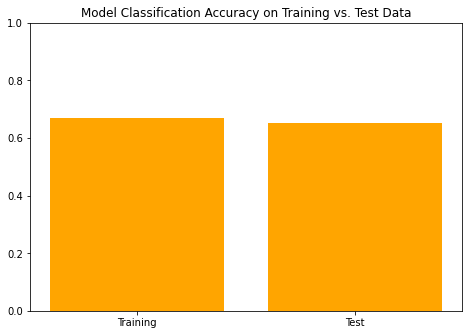

In [65]:
# 80-20

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=100, shuffle=True, test_size=0.20, stratify=y)

# Check accuracy
import matplotlib.pyplot as plt

#Create a Gaussian Classifier
NBmodel1 = GaussianNB()

# Train the model 
NBmodel1.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores1 = [NBmodel1.score(X_train, y_train), NBmodel1.score(X_test, y_test)]


# Plot the accuracy 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuracy on Training vs. Test Data')
ax.bar(labels, scores1, color="orange")
ax.set_ylim(0, 1)
plt.show()



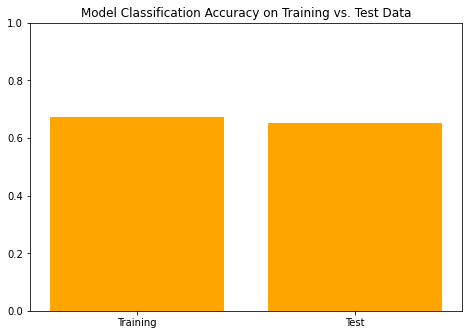

In [57]:
# 75-25

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=100, shuffle=True, test_size=0.25, stratify=y)

# Check accuracy
import matplotlib.pyplot as plt

#Create a Gaussian Classifier
NBmodel2 = GaussianNB()

# Train the model 
NBmodel2.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores2 = [NBmodel2.score(X_train, y_train), NBmodel2.score(X_test, y_test)]


# Plot the accuracy 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuracy on Training vs. Test Data')
ax.bar(labels, scores2, color="orange")
ax.set_ylim(0, 1)
plt.show()


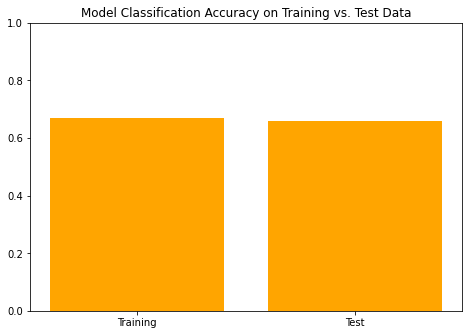

In [59]:
# 70-30

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=100, shuffle=True, test_size=0.30, stratify=y)

# Check accuracy
import matplotlib.pyplot as plt

#Create a Gaussian Classifier
NBmodel3 = GaussianNB()

# Train the model 
NBmodel3.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores3 = [NBmodel3.score(X_train, y_train), NBmodel3.score(X_test, y_test)]


# Plot the accuracy 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuracy on Training vs. Test Data')
ax.bar(labels, scores3, color="orange")
ax.set_ylim(0, 1)
plt.show()


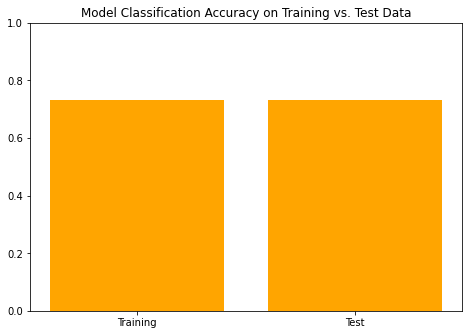

In [60]:
# 60-40

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=100, shuffle=True, test_size=0.40, stratify=y)

# Check accuracy
import matplotlib.pyplot as plt

#Create a Gaussian Classifier
NBmodel4 = GaussianNB()

# Train the model 
NBmodel4.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores4 = [NBmodel4.score(X_train, y_train), NBmodel4.score(X_test, y_test)]


# Plot the accuracy 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuracy on Training vs. Test Data')
ax.bar(labels, scores4, color="orange")
ax.set_ylim(0, 1)
plt.show()


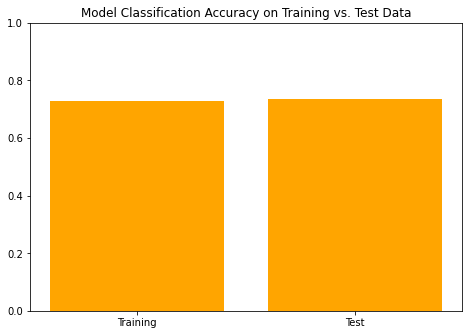

In [61]:
# 50-50

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=100, shuffle=True, test_size=0.50, stratify=y)

# Check accuracy
import matplotlib.pyplot as plt

#Create a Gaussian Classifier
NBmodel5 = GaussianNB()

# Train the model 
NBmodel5.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores5 = [NBmodel5.score(X_train, y_train), NBmodel5.score(X_test, y_test)]


# Plot the accuracy 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuracy on Training vs. Test Data')
ax.bar(labels, scores5, color="orange")
ax.set_ylim(0, 1)
plt.show()


In [73]:
# Summary of scores

print("80-20")
print("Training: ", scores1[0])
print("Test: ", scores1[1])
print()
print("75-25")
print("Training: ", scores2[0])
print("Test: ", scores2[1])
print()
print("70-30")
print("Training: ", scores3[0])
print("Test: ", scores3[1])
print()
print("60-40")
print("Training: ", scores4[0])
print("Test: ", scores4[1])
print()
print("50-50")
print("Training: ", scores5[0])
print("Test: ", scores5[1])

80-20
Training:  0.6704035874439462
Test:  0.6517189835575485

75-25
Training:  0.6718500797448166
Test:  0.6511350059737157

70-30
Training:  0.6693720632208457
Test:  0.6603585657370518

60-40
Training:  0.7309417040358744
Test:  0.7324364723467862

50-50
Training:  0.7278708133971292
Test:  0.7352062163777645
